<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/examples/3a_moving_averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load four `pandas` `DataFrame` objects: `shampoo`,`housing`, `airline`, and `airline_series`.
Each of these is used in Makridakis Chapter 3. 

In [11]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e3.sh > fetch_e3.sh
!bash fetch_e3.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')
airline = pd.read_csv('airline.csv').set_index('year')
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')

!pip install -U statsmodels

from statsmodels.nonparametric.smoothers_lowess import lowess

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   4175      0 --:--:-- --:--:-- --:--:--  4175
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   5376      0 --:--:-- --:--:-- --:--:--  5376
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  37543      0 --:--:-- --:--:-- --:--:-- 37543
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   456  100   456    0     0   4851      0 --:--:-- --:--:-- --:--:--  4800
  % Total    % Received % Xferd  Average Speed   Tim

# 1: Moving Averages

1. Create **3MA**, **5MA**, and **7MA** smoothers for the airline data and plot
2. Create **2x12MA*, **2x24MA**, and **2x36MA** smoothers for the housing data and plot


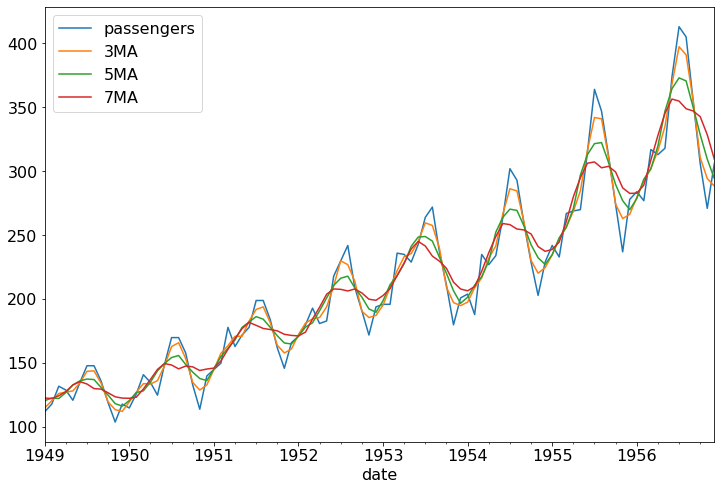

In [12]:
# YOUR CODE HERE

airline_series['3MA'] = airline_series['passengers'].rolling(3, center=True, min_periods=1).mean()
airline_series['5MA'] = airline_series['passengers'].rolling(5, center=True, min_periods=1).mean()
airline_series['7MA'] = airline_series['passengers'].rolling(7, center=True, min_periods=1).mean()
airline_series.plot()

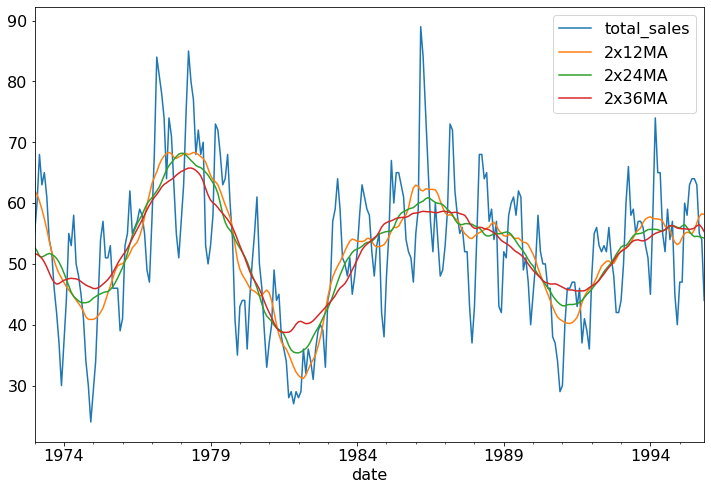

In [13]:
# YOUR CODE HERE

housing['2x12MA'] = housing['total_sales'].rolling(12, center=True, min_periods=1).mean().rolling(2, center=True, min_periods=1).mean()
housing['2x24MA'] = housing['total_sales'].rolling(24, center=True, min_periods=1).mean().rolling(2, center=True, min_periods=1).mean()
housing['2x36MA'] = housing['total_sales'].rolling(36, center=True, min_periods=1).mean().rolling(2, center=True, min_periods=1).mean()
housing.plot()

# 2. Local Smoothing


* Calculate a local LOWESS smoother for the `airline_series` data and plot
* Try this out for various values of `frac`

In [14]:
# Start by reloading the `airline_series` data so you have a fresh copy
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')

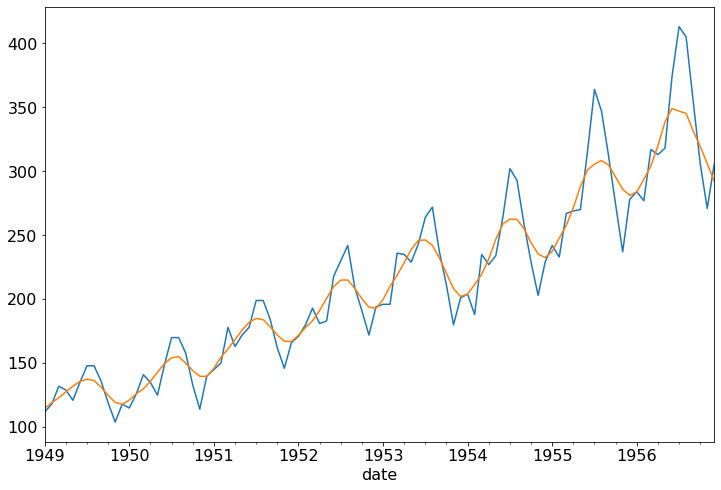

In [19]:
# YOUR CODE HERE

frac = 0.1

smoothed = lowess(airline_series['passengers'], airline_series.index, frac=frac, return_sorted=False)

airline_series['smoothed'] = smoothed

airline_series['passengers'].plot()
airline_series['smoothed'].plot()

# 3. Decomposition

Carry out an additive decomposition for the housing data, but this time use a LOWESS smoother to calculate the trend-cycle. 

1. Calculate the trend cycle using LOWESS, choosing an appropriate value for `frac`. Make sure to plot to check you're not over smoothing
2. De-trend the data
3. Calculate the seasonal indices, and repeat them to create the full seasonal series
4. Calculate the irregular

In [21]:
# Start by reloading the housing data
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')

## Trend-cycle

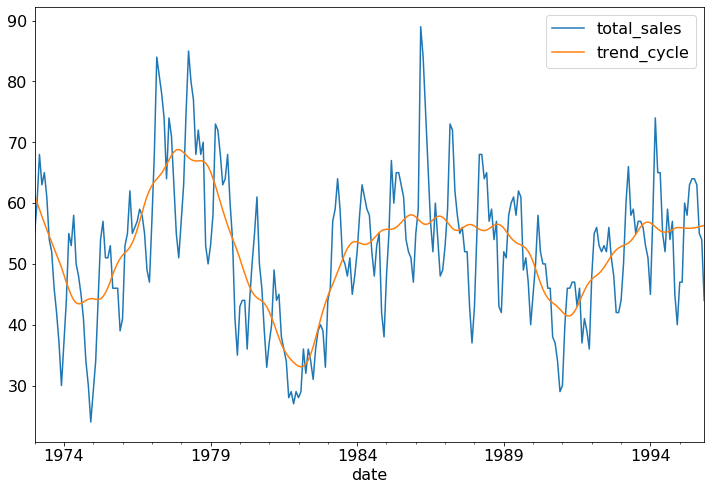

In [25]:
# YOUR CODE HERE

frac = 0.1

smoothed = lowess(housing['total_sales'], housing.index, frac=frac, return_sorted=False)

housing['trend_cycle'] = smoothed

housing.plot()

## Detrended

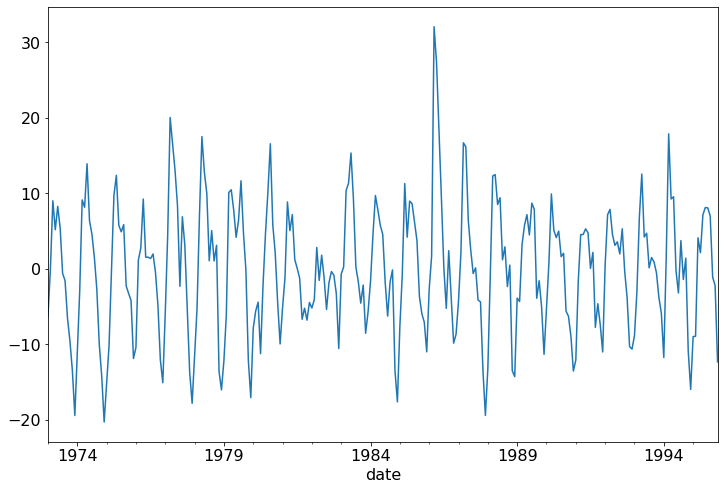

In [26]:
housing['detrended'] = housing['total_sales'] - housing['trend_cycle']
housing['detrended'].plot()

## Seasonal Indices

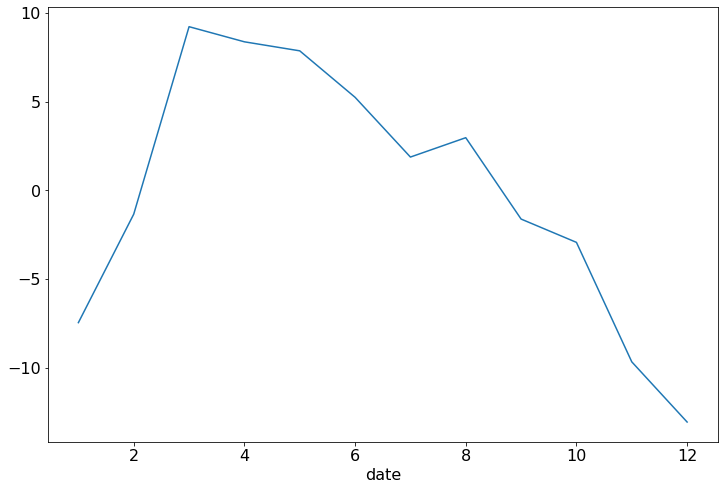

In [27]:
# YOUR CODE HERE

seasonal_indices = housing.groupby(housing.index.month)['detrended'].mean()

seasonal_indices.plot()

## Seasonal Component

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


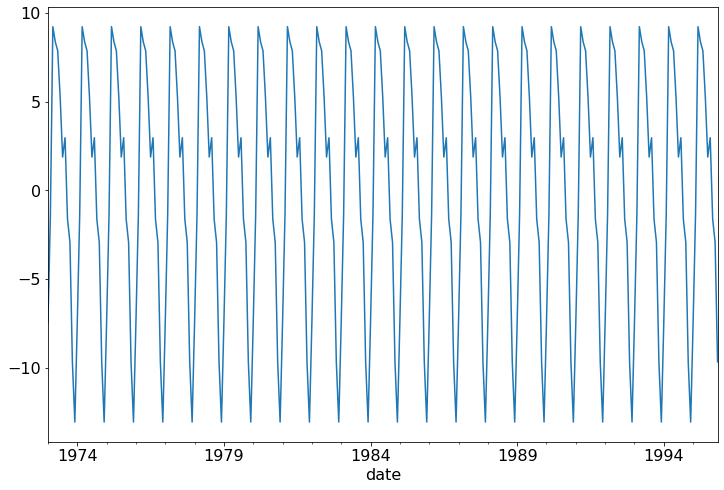

In [28]:
# YOUR CODE HERE

seasonal_repeated = pd.np.tile(seasonal_indices, (23))

number_observations = housing.shape[0]

seasonal_repeated = seasonal_repeated[0:number_observations]

housing['seasonal'] = seasonal_repeated

housing['seasonal'].plot()

## Irregular

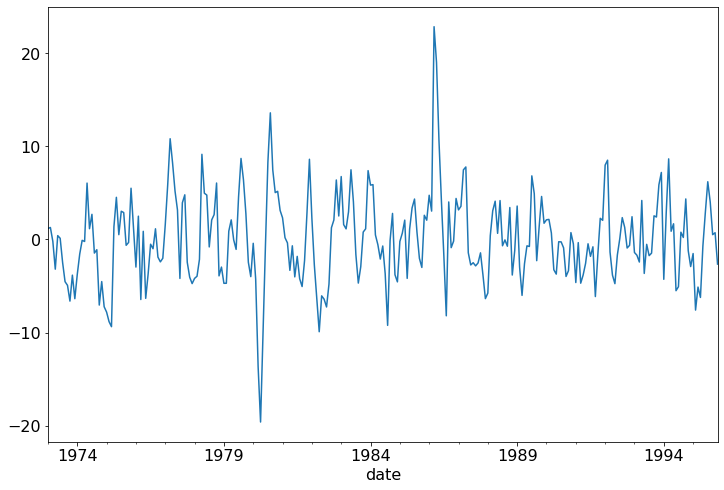

In [30]:
# YOUR CODE HERE

housing['irregular'] = housing['total_sales'] - housing['trend_cycle'] - housing['seasonal']

housing['irregular'].plot()